# Project Title: Flight Fare Prediction

# Objective:

# Description:

# Import Library and Dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
# Here we are importing dataset by using pandas

data = pd.read_csv(r"E:\Imarticus\kaggle project\Flight_fare_prediction.csv")

In [3]:
# always create a copy 
df = data.copy()

In [4]:
# Lets see what is in the data
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 12)

In [6]:
# Droping the useless column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'],  axis = 1)

In [7]:
# A quick information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
# Size of the data 
df.shape

(300153, 11)

In [9]:
# Stastical description of data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [11]:
df1 = df.groupby(['flight',  'airline'], as_index= False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


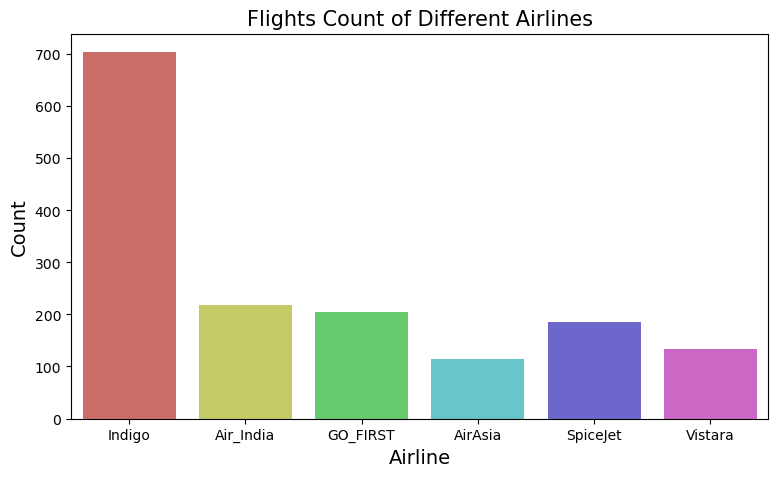

In [14]:
# Indigo becaming as a most popular Airline

plt.figure(figsize= (9,5))
sns.countplot(df1['airline'], palette='hls') 
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

In [15]:
#  palette='hls' -------it gives by default colors with identical lightness

In [16]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [17]:
df2 = df.groupby(['flight',  'airline',  'class'], as_index= False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

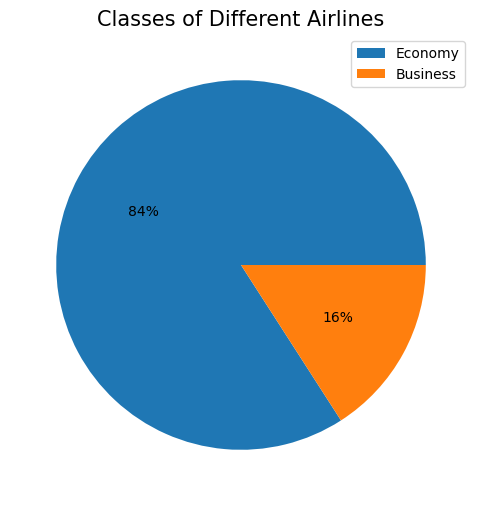

In [18]:
# Most of the Airlines has Economic Class as common

plt.figure(figsize=(8,6))
plt.pie(df2['class'].value_counts(), autopct='%1.0f%%');
plt.title('Classes of Different Airlines', fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

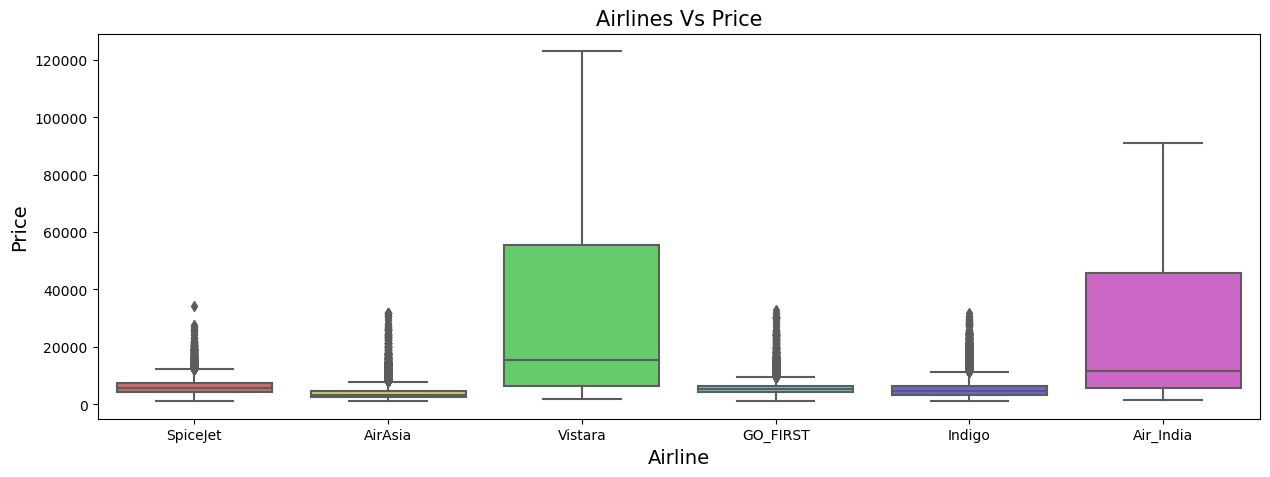

In [19]:
# Does price vary with Airlines ?

plt.figure(figsize=(15,5))
sns.boxplot(x='airline',y='price',data = df, palette='hls')
#sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

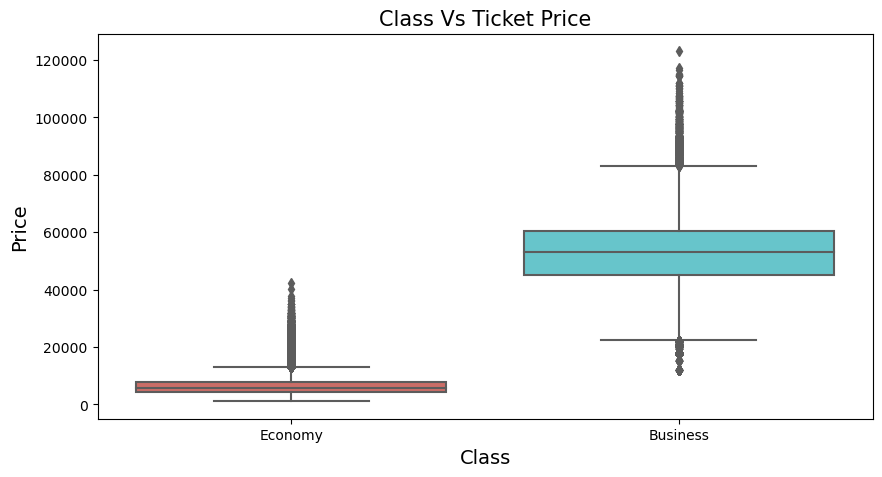

In [20]:
# How Does the Ticket Price vary between Economy and Business Class?

plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='price', data = df, palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

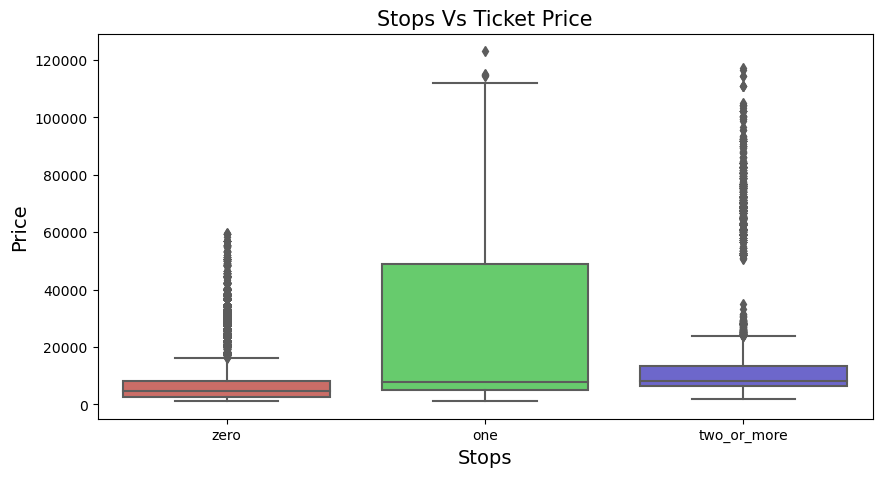

In [21]:
# How Does the Ticket Price vary with the number of stops of a Flight?

plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

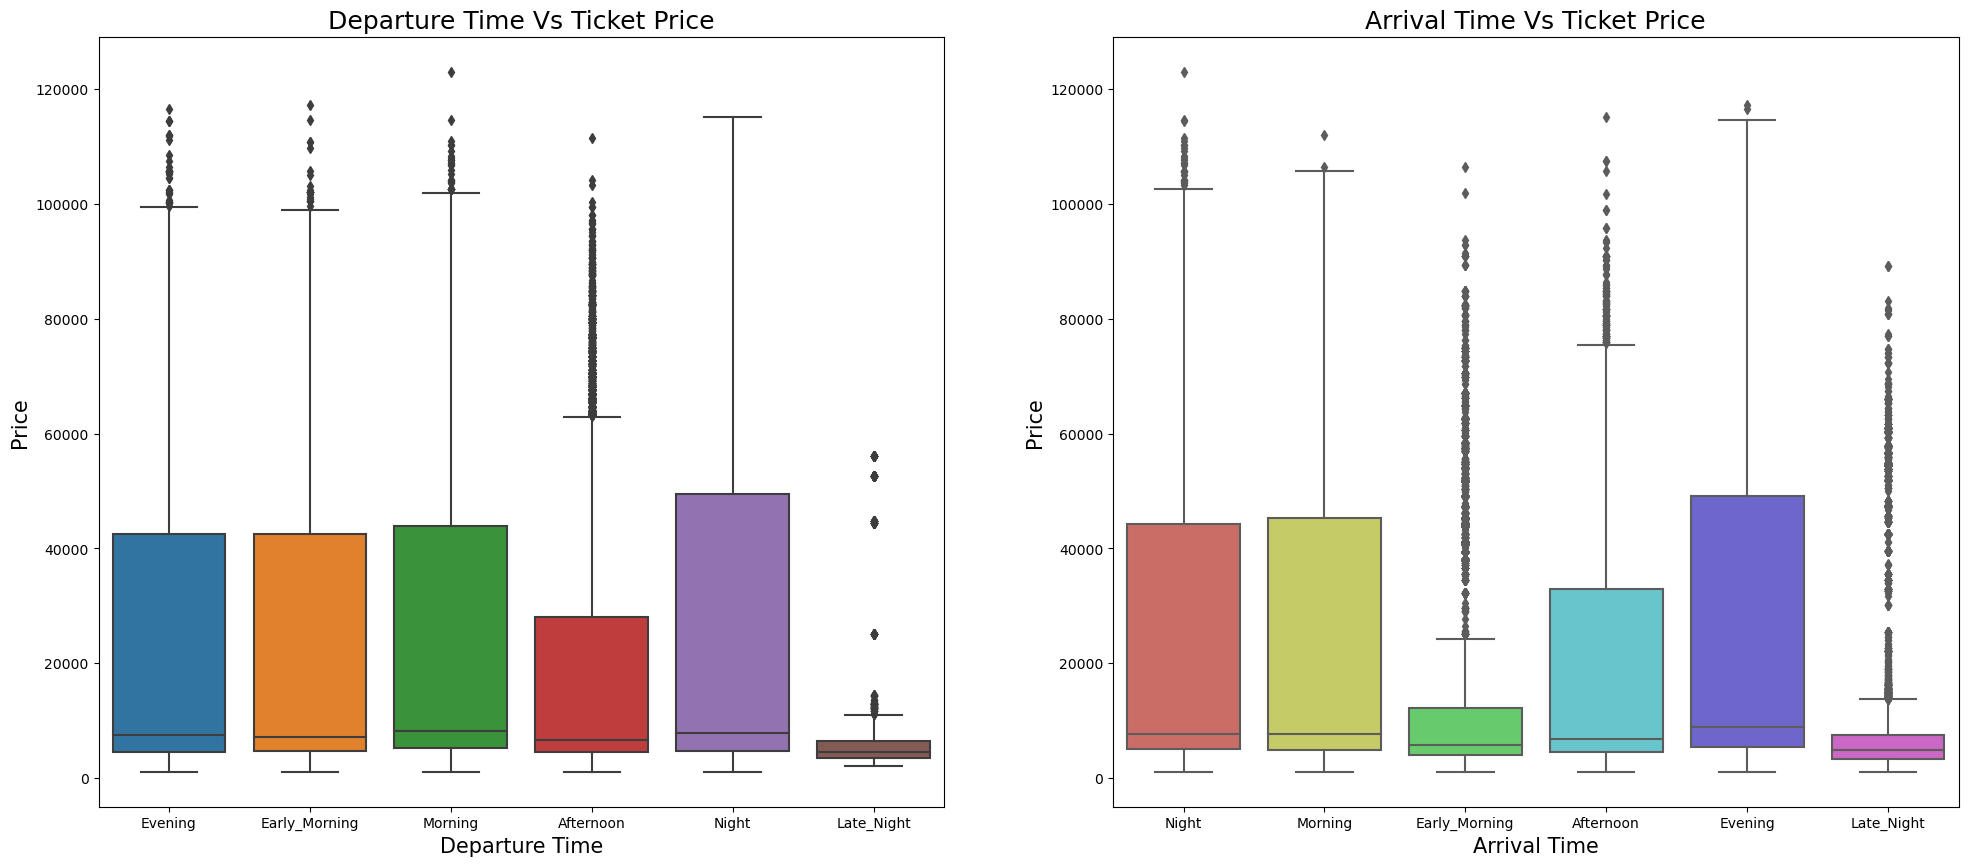

In [22]:
# How the Ticket Price change based on the Departure Time and Arrival Time?

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=18)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time', y='price', data = df, palette ='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=18)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

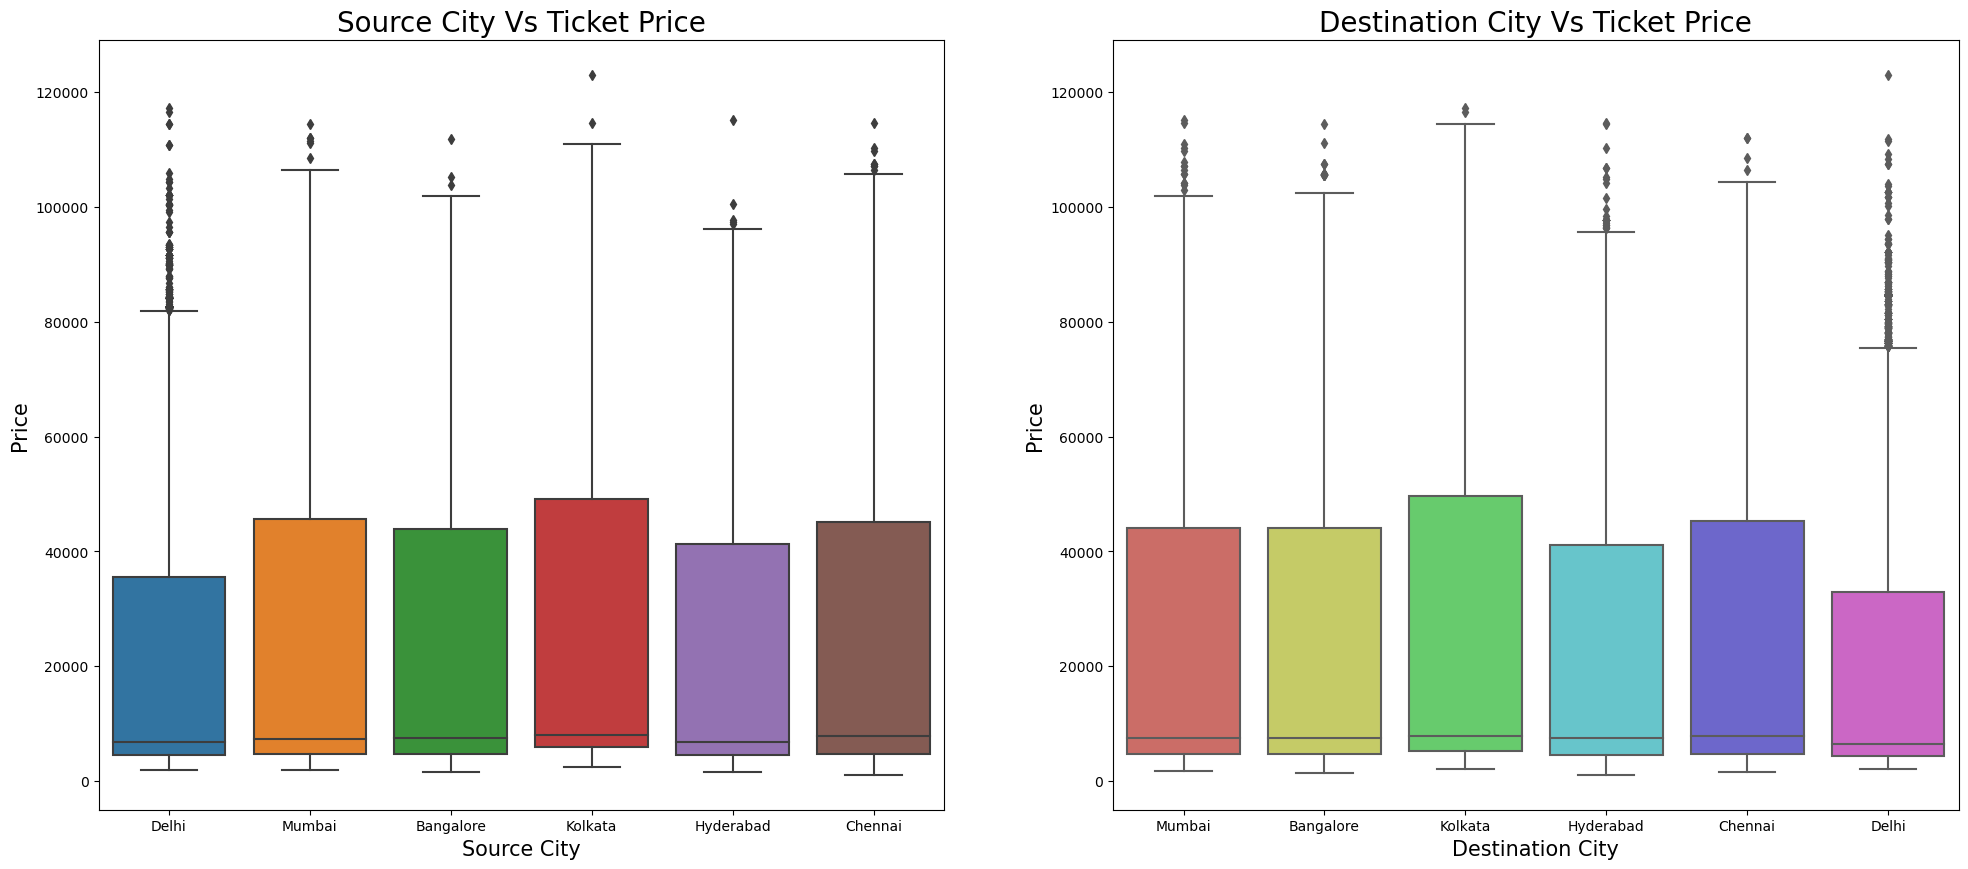

In [23]:
# How the price changes with change in Source city and Destination city?

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

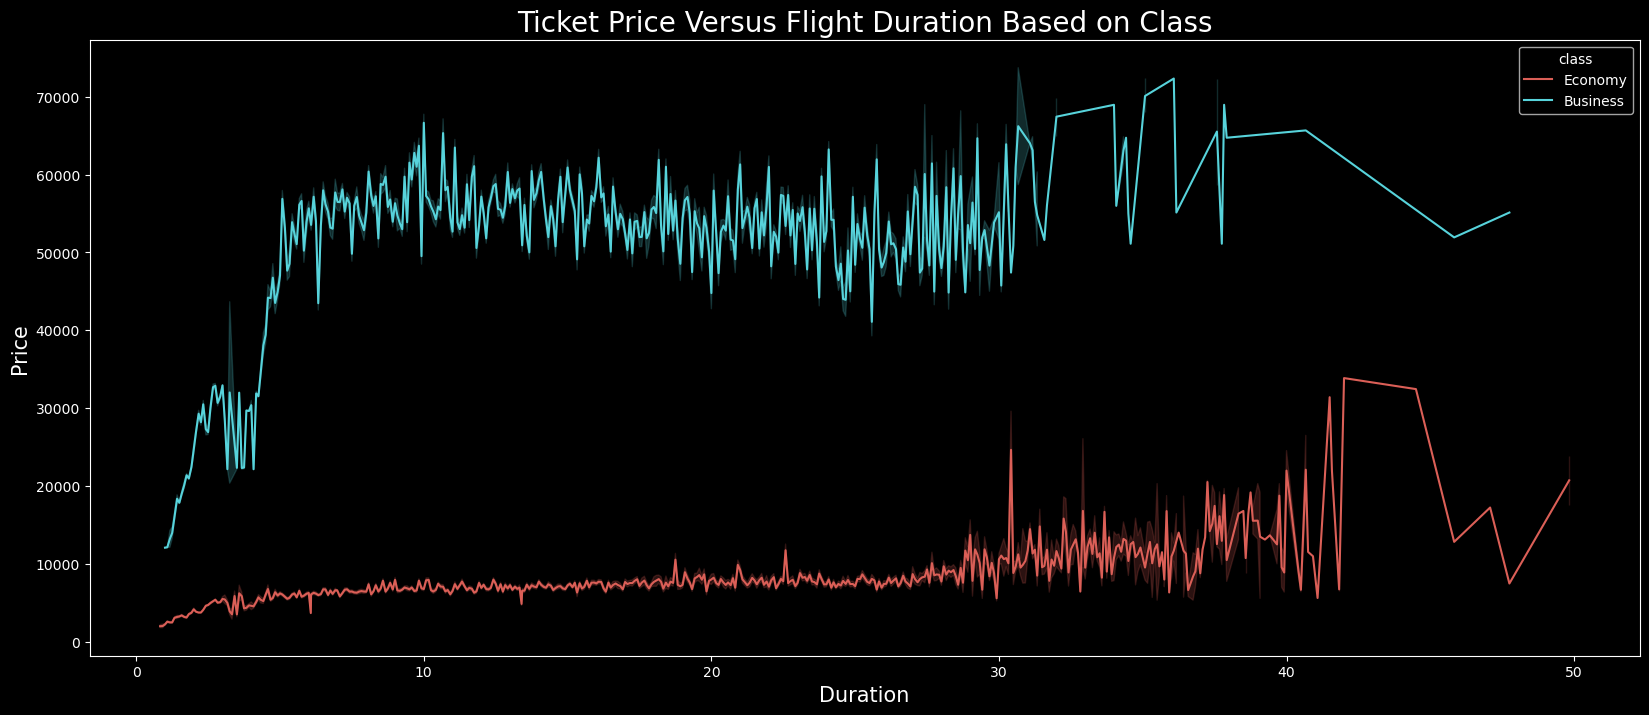

In [24]:
# How Price Varies with the Flight Duration Based on Class?

plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data= df,x='duration', y='price', hue ='class', palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

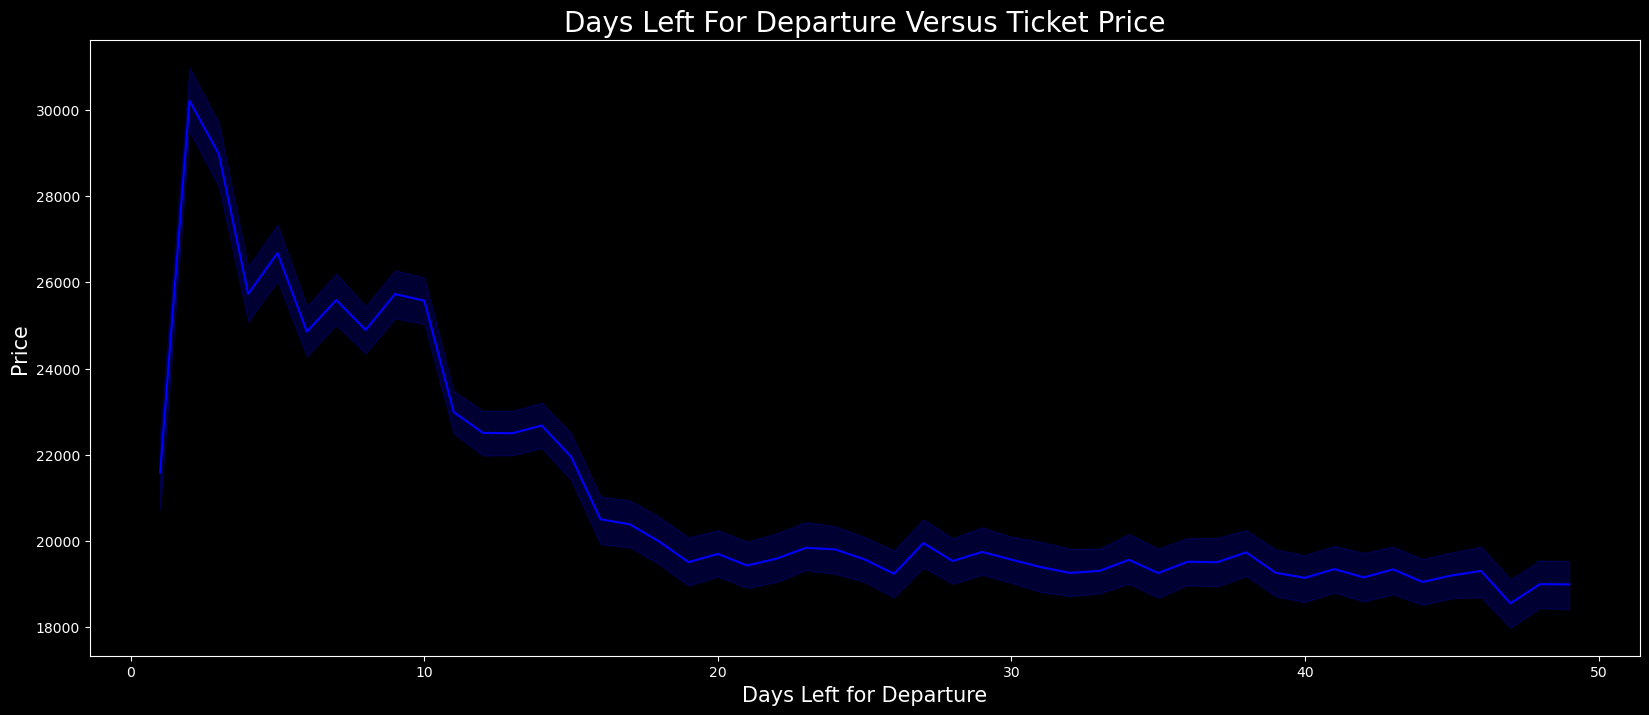

In [25]:
# How does the price affected on the days left for Departure?

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

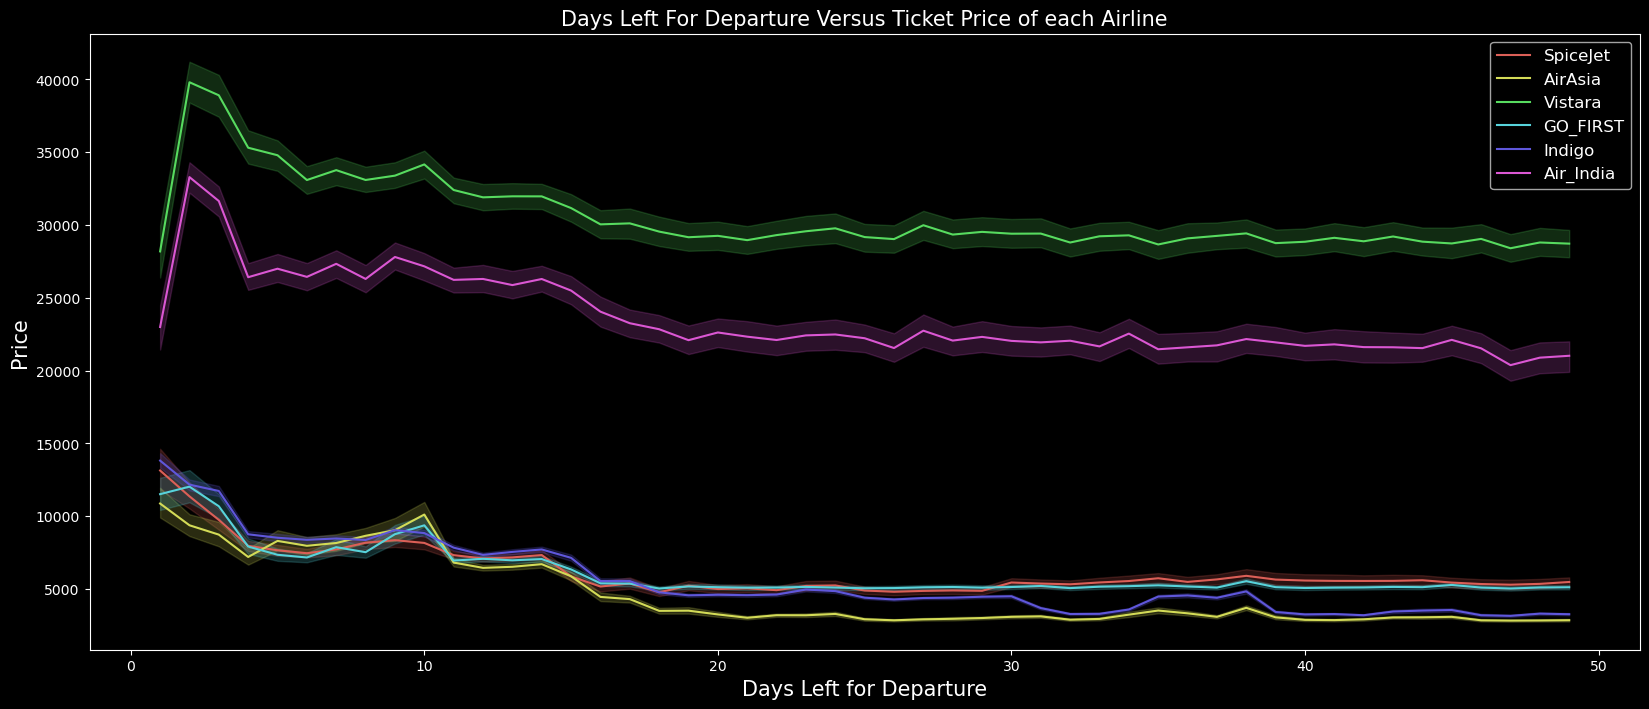

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [27]:
# Total number of Flights from one city to another

#df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

In [28]:
# Average Price of different Airlnes from Source city to Destination city

df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(15)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [29]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df.airline = le.fit_transform(df.airline)
df.flight = le.fit_transform(df.flight)
df.source_city = le.fit_transform(df.source_city)
df.departure_time = le.fit_transform(df.departure_time)
df.stops = df.stops.replace({'zero' : 0,  'one' : 1,  'two_or_more' : 2})
df.arrival_time = le.fit_transform(df.arrival_time)
df.destination_city = le.fit_transform(df.destination_city)
df['class'] = le.fit_transform(df['class'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(3)
memory usage: 17.2 MB


In [33]:
# storing the Dependent Variables in X and Independent Variable in Y

x = df.drop(['price'], axis = 1)

y = df['price']

In [34]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape    # checking the dimensions of the train & test 

((210107, 10), (90046, 10), (210107,), (90046,))

In [35]:
# Scaling the values to convert the int values to Machine Languages

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test) 

In [36]:
# if we not put in dataframe format then it will come in array format (x_train,  x_test)

# 1. Linear Regression

In [37]:
n = x_train.shape[0]
k = x_train.shape[1]

In [38]:
lin_reg = LinearRegression()

lin_reg_model = lin_reg.fit(x_train,  y_train)

lin_reg_predict = lin_reg_model.predict(x_test)

R2_linear = round(lin_reg_model.score(x_train,  y_train),6)

Adj_R2_linear =  round(1 - (1-R2_linear)*(n-1)/(n-k-1),5)

MSE_linear = round(metrics.mean_squared_error(y_test, lin_reg_predict),4)

RMSE_linear = round(np.sqrt(metrics.mean_squared_error(y_test,  lin_reg_predict)),4)

MAE_linear = round(metrics.mean_absolute_error(y_test,  lin_reg_predict),4)

MAPE_linear = (metrics.mean_absolute_percentage_error(y_test, lin_reg_predict)*100 )


In [39]:
print("Model name is:", lin_reg)
print("R2_score:", R2_linear)
print("Adj R Square:", Adj_R2_linear)
print("Mean Squared Error (MSE):", MSE_linear)
print("Root Mean Squared Error (RMSE):", RMSE_linear)
print("Mean Absolute Error (MAE):", MAE_linear)
print("Mean Absolute Percentage Error (MAPE):", round(MAPE_linear, 2), '%')

Model name is: LinearRegression()
R2_score: 0.906351
Adj R Square: 0.90635
Mean Squared Error (MSE): 48167176.6366
Root Mean Squared Error (RMSE): 6940.2577
Mean Absolute Error (MAE): 4539.3443
Mean Absolute Percentage Error (MAPE): 42.49 %


# 2. Decision Tree

In [40]:
decision_tree = DecisionTreeRegressor(criterion ='friedman_mse',  max_depth = 3)

decision_tree_model = decision_tree.fit(x_train,  y_train)

decision_tree_predict = decision_tree_model.predict(x_test)

R2_decision_tree = round(decision_tree_model.score(x_train,  y_train),5)

Adj_R2_decision_tree = round(1 - (1- R2_decision_tree)*(n-1)/(n-k-1),5)

MSE_decision_tree = round(metrics.mean_squared_error(y_test, decision_tree_predict),4)

RMSE_decision_tree = round(np.sqrt(metrics.mean_squared_error(y_test,  decision_tree_predict)),4)

MAE_decision_tree = round(metrics.mean_absolute_error(y_test,  decision_tree_predict),4)

MAPE_decision_tree = (metrics.mean_absolute_percentage_error(y_test, decision_tree_predict)*100 )


In [41]:
print("Model name is:", decision_tree)
print("R2_score:", R2_decision_tree)
print("Adj R Square:", Adj_R2_decision_tree)
print("Mean Squared Error (MSE):", MSE_decision_tree)
print("Root Mean Squared Error (RMSE):", RMSE_decision_tree)
print("Mean Absolute Error (MAE):", MAE_decision_tree)
print("Mean Absolute Percentage Error (MAPE):", round(MAPE_decision_tree, 2), '%')

Model name is: DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)
R2_score: 0.93509
Adj R Square: 0.93509
Mean Squared Error (MSE): 33610408.6811
Root Mean Squared Error (RMSE): 5797.4485
Mean Absolute Error (MAE): 3488.8875
Mean Absolute Percentage Error (MAPE): 27.5 %


In [42]:
# criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"

# 3. Random Forest

In [43]:
random_forest = RandomForestRegressor()

random_forest_model = random_forest.fit(x_train,  y_train)

random_forest_predict = random_forest_model.predict(x_test)

R2_random_forest = round(random_forest_model.score(x_train,  y_train),5)

Adj_R2_random_forest = round(1 - (1- R2_random_forest)*(n-1)/(n-k-1),5)

MSE_random_forest = round(metrics.mean_squared_error(y_test, random_forest_predict),4)

RMSE_random_forest = round(np.sqrt(metrics.mean_squared_error(y_test,  random_forest_predict)),4)

MAE_random_forest = round(metrics.mean_absolute_error(y_test,  random_forest_predict),4)

MAPE_random_forest = (metrics.mean_absolute_percentage_error(y_test, random_forest_predict)*100 )


In [44]:
print("Model name is:", random_forest)
print("R2_score:", R2_random_forest)
print("Adj R Square:", Adj_R2_random_forest)
print("Mean Squared Error (MSE):", MSE_random_forest)
print("Root Mean Squared Error (RMSE):", RMSE_random_forest)
print("Mean Absolute Error (MAE):", MAE_random_forest)
print("Mean Absolute Percentage Error (MAPE):", round(MAPE_random_forest, 2), '%')

Model name is: RandomForestRegressor()
R2_score: 0.99847
Adj R Square: 0.99847
Mean Squared Error (MSE): 8180896.7778
Root Mean Squared Error (RMSE): 2860.2267
Mean Absolute Error (MAE): 1171.3532
Mean Absolute Percentage Error (MAPE): 7.91 %


# 4. Extra Trees Regressor

In [62]:
extra_tree = ExtraTreesRegressor()

extra_tree_model = extra_tree.fit(x_train,  y_train)

extra_tree_predict = extra_tree_model.predict(x_test)

R2_extra_tree = round(extra_tree_model.score(x_train,  y_train),5)

Adj_R2_extra_tree = round(1 - (1- R2_extra_tree)*(n-1)/(n-k-1),5)

MSE_extra_tree = round(metrics.mean_squared_error(y_test, extra_tree_predict),4)

RMSE_extra_tree = round(np.sqrt(metrics.mean_squared_error(y_test,  extra_tree_predict)),4)

MAE_extra_tree = round(metrics.mean_absolute_error(y_test,  extra_tree_predict),4)

MAPE_extra_tree = (metrics.mean_absolute_percentage_error(y_test, extra_tree_predict)*100 )



In [63]:
print("Model name is:", extra_tree)
print("R2_score:", R2_extra_tree)
print("Adj R Square:", Adj_R2_extra_tree)
print("Mean Squared Error (MSE):", MSE_extra_tree)
print("Root Mean Squared Error (RMSE):", RMSE_extra_tree)
print("Mean Absolute Error (MAE):", MAE_extra_tree)
print("Mean Absolute Percentage Error (MAPE):", round(MAPE_extra_tree, 2), '%')

Model name is: ExtraTreesRegressor()
R2_score: 0.99991
Adj R Square: 0.99991
Mean Squared Error (MSE): 7837036.0662
Root Mean Squared Error (RMSE): 2799.4707
Mean Absolute Error (MAE): 1148.8237
Mean Absolute Percentage Error (MAPE): 7.67 %


# 4. Bagging Regressor

In [45]:
bagging = BaggingRegressor()

bagging_model = bagging.fit(x_train,  y_train)

bagging_predict = bagging_model.predict(x_test)

R2_bagging = round(bagging_model.score(x_train,  y_train),5)

Adj_R2_bagging = round(1 - (1- R2_bagging)*(n-1)/(n-k-1),5)

MSE_bagging = round(metrics.mean_squared_error(y_test, bagging_predict),4)

RMSE_bagging = round(np.sqrt(metrics.mean_squared_error(y_test,  bagging_predict)),4)

MAE_bagging = round(metrics.mean_absolute_error(y_test,  bagging_predict),4)

MAPE_bagging = (metrics.mean_absolute_percentage_error(y_test, bagging_predict)*100 )


In [46]:
print("Model name is:", bagging)
print("R2_score:", R2_bagging)
print("Adj R Square:", Adj_R2_bagging)
print("Mean Squared Error (MSE):", MSE_bagging)
print("Root Mean Squared Error (RMSE):", RMSE_bagging)
print("Mean Absolute Error (MAE):", MAE_bagging)
print("Mean Absolute Percentage Error (MAPE):", round(MAPE_bagging, 2), '%')

Model name is: BaggingRegressor()
R2_score: 0.99791
Adj R Square: 0.99791
Mean Squared Error (MSE): 9209618.4364
Root Mean Squared Error (RMSE): 3034.7353
Mean Absolute Error (MAE): 1218.7908
Mean Absolute Percentage Error (MAPE): 8.27 %


# 4. Gradient Boosting Regressor

In [47]:
gradient_boost = GradientBoostingRegressor()

gradient_boost_model = gradient_boost.fit(x_train,  y_train)

gradient_boost_predict = gradient_boost_model.predict(x_test)

R2_gradient_boost = round(gradient_boost_model.score(x_train,  y_train),5)

Adj_R2_gradient_boost = round(1 - (1- R2_gradient_boost)*(n-1)/(n-k-1),5)

MSE_gradient_boost = round(metrics.mean_squared_error(y_test, gradient_boost_predict),4)

RMSE_gradient_boost = round(np.sqrt(metrics.mean_squared_error(y_test,  gradient_boost_predict)),4)

MAE_gradient_boost = round(metrics.mean_absolute_error(y_test,  gradient_boost_predict),4)

MAPE_gradient_boost = (metrics.mean_absolute_percentage_error(y_test, gradient_boost_predict)*100 )


In [48]:
print("Model name is:", gradient_boost)
print("R2_score:", R2_gradient_boost)
print("Adj R Square:", Adj_R2_gradient_boost)
print("Mean Squared Error (MSE):", MSE_gradient_boost)
print("Root Mean Squared Error (RMSE):", RMSE_gradient_boost)
print("Mean Absolute Error (MAE):", MAE_gradient_boost)
print("Mean Absolute Percentage Error (MAPE):", round(MAPE_gradient_boost, 2), '%')

Model name is: GradientBoostingRegressor()
R2_score: 0.95822
Adj R Square: 0.95822
Mean Squared Error (MSE): 21832121.4298
Root Mean Squared Error (RMSE): 4672.4856
Mean Absolute Error (MAE): 2789.1789
Mean Absolute Percentage Error (MAPE): 20.8 %


In [ ]:
From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are

1. ExtraTreesRegressor 

2. RandomForestRegressor 

3. Bagging Regressor


Therefore, training the Data with ExtraTreesRegressor

In [64]:
y_pred = extra_tree_model.predict(x_test)

In [65]:
# Trainig the model with
extra_tree_model = extra_tree.fit(x_train,  y_train)
    
# Predict the model with test data

y_pred = extra_tree_model.predict(x_test)

In [66]:
y_pred

array([ 7188.3 , 76841.69,  6235.48, ...,  2554.73,  3222.85,  3444.63])

In [67]:
output = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred})

result = df.merge(output, left_index = True, right_index = True)

In [68]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
74273,1,863,5,4,1,2,3,1,9.33,29,4173,4173,4145.46
289882,5,1479,1,5,1,2,2,0,20.42,41,57920,57920,57920.00
33126,5,1468,2,2,1,5,3,1,27.33,34,5761,5761,5947.02
48518,1,817,5,1,1,5,2,1,15.08,29,5269,5269,5526.20
209704,5,1489,2,2,1,4,5,0,13.08,29,51384,51384,51864.71
240534,5,1550,5,4,1,5,3,0,14.17,36,60365,60365,60482.54
227981,1,872,5,5,0,5,2,0,2.25,31,22140,22140,23442.33
47977,0,1215,5,1,0,4,2,1,2.17,27,2339,2339,2518.88
149513,3,176,4,2,1,5,1,1,7.58,18,5871,5871,5533.75
234093,5,1500,5,1,0,4,0,0,1.83,49,20684,20684,21371.59


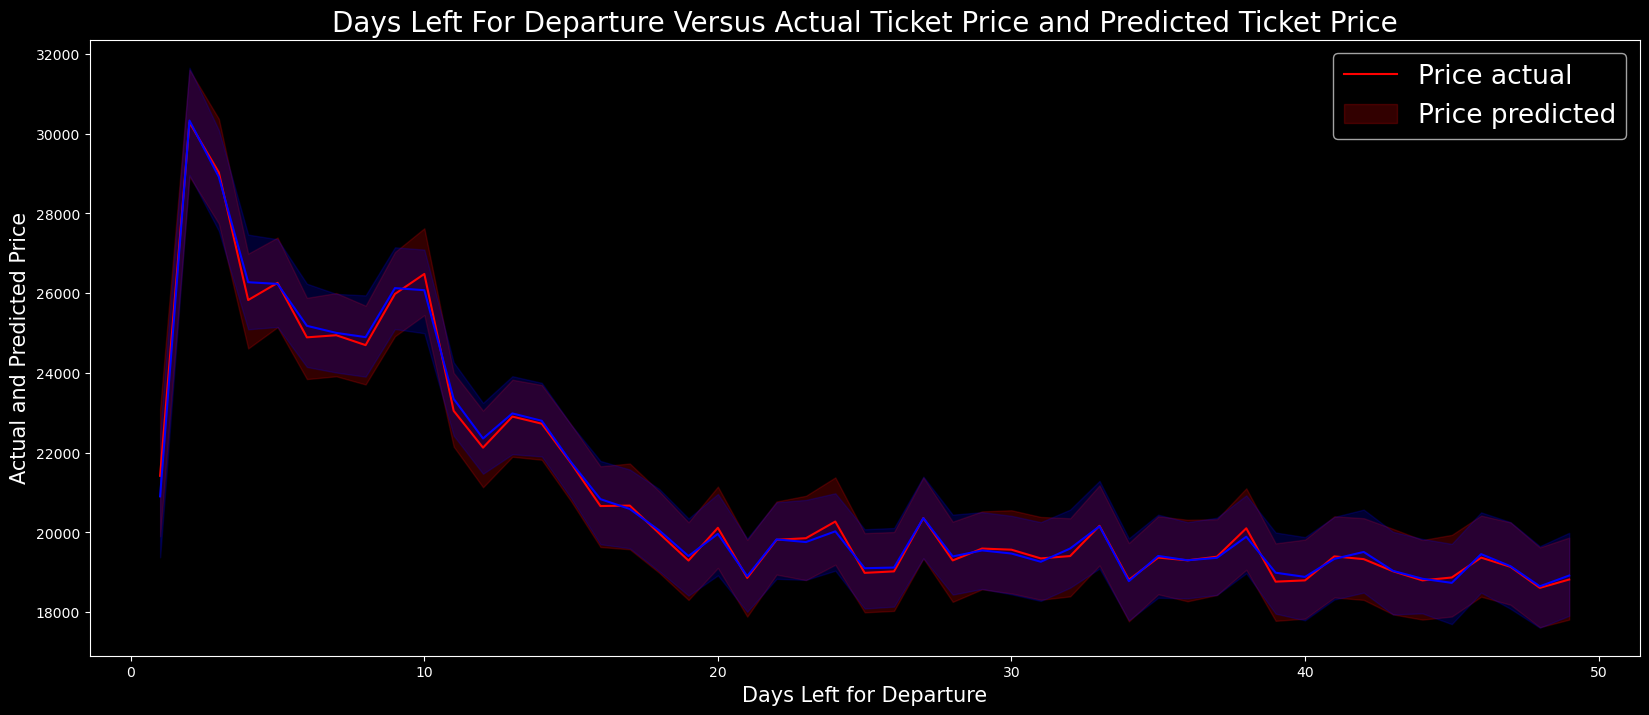

In [69]:
plt.figure(figsize=(20,8))
sns.lineplot(data = result, x='days_left', y ='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

# Outcome: 